In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential, load_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img_height = 227
img_width = 227
batch_size = 128

In [3]:
#Load data using keras utils

# zoom 16
# imagefolder = "C:\\Users\\Joe\\Box\\Wesley\\Learning Analytics\\HUDK 4050\\Final\\Data\\google_maps_satellite_227_227_16_4_classes_elementary"
# zoom 14
imagefolder = "C:\\Users\\Joe\\Box\\Wesley\\Learning Analytics\\HUDK 4050\\Final\\Data\\google_maps_satellite_227_227_16_4_classes_elementary"

train_ds = keras.preprocessing.image_dataset_from_directory(
    imagefolder,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    imagefolder,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 18939 files belonging to 4 classes.
Using 15152 files for training.
Found 18939 files belonging to 4 classes.
Using 3787 files for validation.


In [4]:
#Load the Xception pre-trained model
#include_top=False means that you’re not interested in the last layer of the model. You will be creating and training this layer yourself.
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(img_height, img_width, 3),
    include_top=False)

In [ ]:
#To prevent the base model being retrained
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))

In [ ]:
#Preprocess inputs as expected by Xception
x = tf.keras.applications.xception.preprocess_input(inputs)

In [ ]:
#Build the last layers
#Use the functional API method in Keras to illustrate this approach
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(4)(x) # number of classes
model = keras.Model(inputs, outputs)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=25, validation_data=test_ds) # callback for early stopping would go here

In [5]:
# saving the model
# model.save('model_elementary_25_epoch_2022_12_18_zoom_14.h5')
model = load_model('model_elementary_25_epoch_2022_12_18_zoom_14.h5')

In [6]:
predicted_classes = np.array([])
true_classes =  np.array([])
for x, y in test_ds:
    for q in range(np.shape(x)[0]):
        xtemp = x[q,:,:,:]
        xtemp = xtemp[np.newaxis,:,:,:]
        ypred = np.argmax(model.predict(xtemp),axis=-1)
        ytemp = y[q].numpy()
        predicted_classes = np.concatenate([predicted_classes, ypred])
        true_classes = np.concatenate([true_classes, [ytemp]])

1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 102ms/step


C:\Users\Joe\anaconda3\envs\HUDK_4050_final_project\lib\site-packages\ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Joe\anaconda3\envs\HUDK_4050_final_project\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


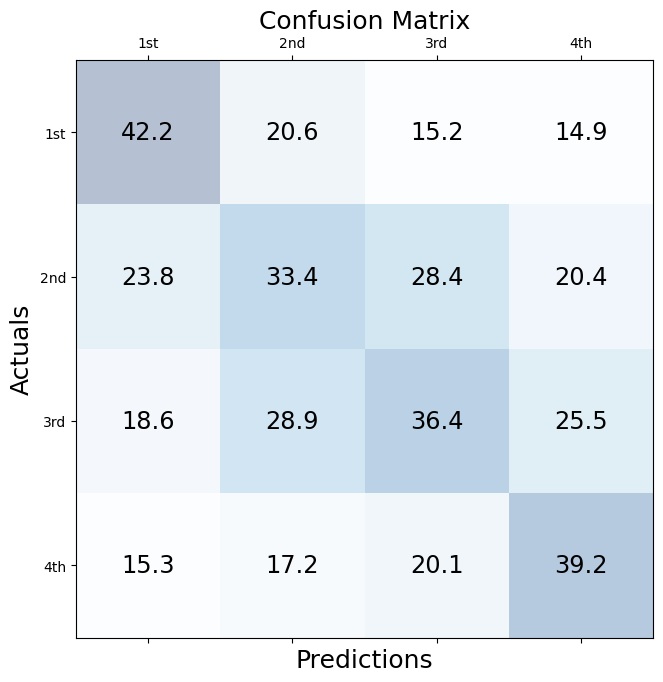

In [4]:
# np.mean(predicted_classes==true_classes) # accuracy
# conf_matrix = tf.math.confusion_matrix(true_classes,predicted_classes)
# conf_matrix = conf_matrix.numpy()
# conf_matrix

# for 'model_elementary_25_epoch_2022_12_18_zoom_16.h5', the confusion matrix is:
# conf_matrix = np.array([[535,  90, 174, 146],
#        [327, 142, 287, 198],
#        [256, 116, 334, 244],
#        [219,  65, 230, 424]])
# conf_matrix = np.round(100*conf_matrix/np.sum(conf_matrix,1),1) # normalized by row sums
# conf_matrix = np.round(100*conf_matrix/np.sum(conf_matrix,0),1) # normalized by col sums

# for 'model_elementary_25_epoch_2022_12_18_zoom_16.h5', the confusion matrix is:
conf_matrix = np.array([[511, 178,  53, 203],
      [289, 289,  99, 277],
      [226, 250, 127, 347],
      [186, 149,  70, 533]])
# conf_matrix = np.round(100*conf_matrix/np.sum(conf_matrix,1),1) # normalized by row sums
conf_matrix = np.round(100*conf_matrix/np.sum(conf_matrix,0),1) # normalized by col sums

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
ax.set_xticklabels(['','1st','2nd','3rd','4th'])
ax.set_yticklabels(['','1st','2nd','3rd','4th'])
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Plot training and test accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(history.epoch) # something like this?

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# saving the model (optional)
model.save('model_elementary_1_epoch_2022_12_18.h5')

In [ ]:
#Load the ResNet50 pre-trained model
#include_top=False means that you’re not interested in the last layer of the model. You will be creating and training this layer yourself.
base_model2 = keras.applications.ResNet50(
    weights='imagenet',
    input_shape=(img_height, img_width, 3),
    include_top=False)

In [ ]:
base_model2.trainable = False

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.xception.preprocess_input(inputs)
x = base_model2(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_ds, epochs=1, validation_data=test_ds)